## Shresht Mishra
## 211020450

In [25]:
import cv2
import pytesseract

In [26]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [27]:
image_path = 'text.jfif'
img = cv2.imread(image_path)
cv2.imshow('Color Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

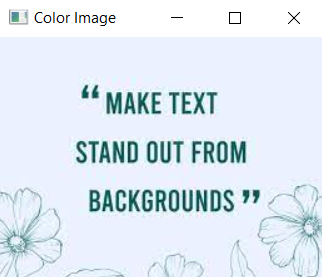

In [28]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [29]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)
im2 = img.copy()
file = open("recognized2.txt", "w+")
file.write("")
file.close()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
    cropped = im2[y:y + h, x:x + w]
     
    # Open the file in append mode
    file = open("recognized.txt", "a")
     
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)
     
    # Appending the text into file
    file.write(text)
    file.write("\n")
     
    # Close the file
    file.close

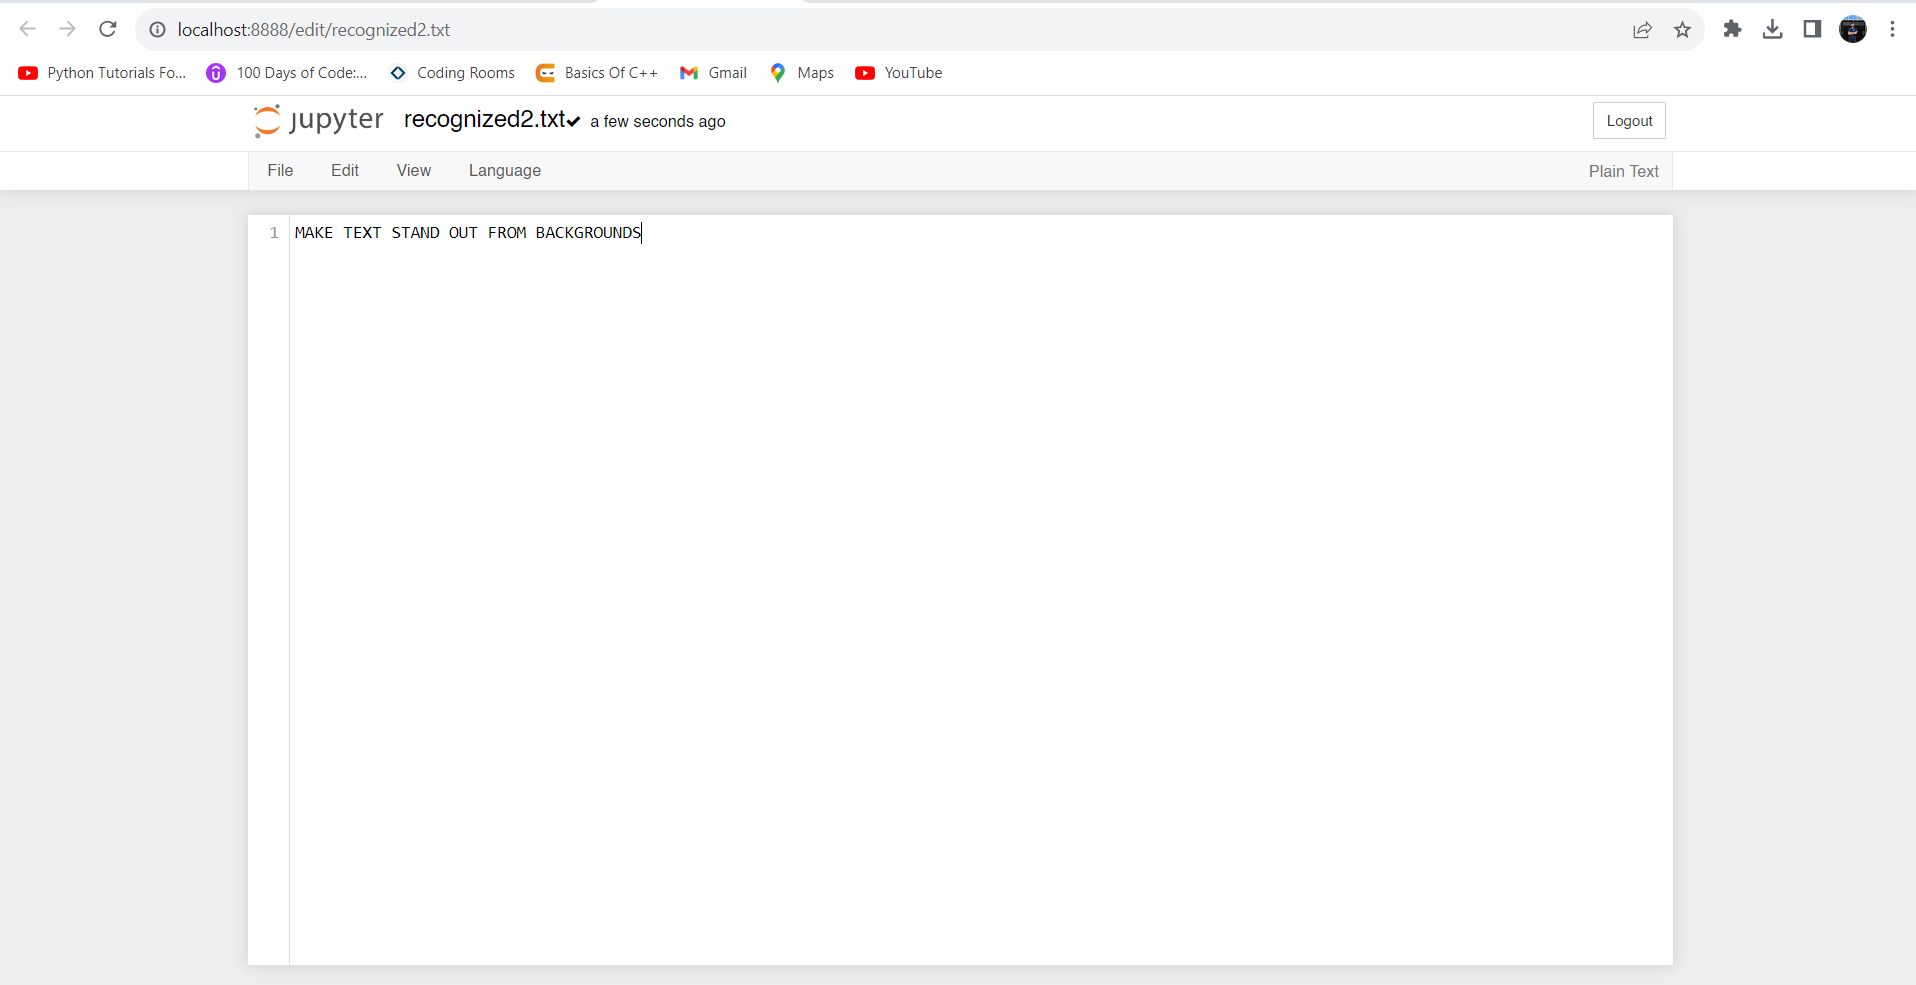